## Hits - Charge Analysis

Working with an H5 file of WatChMal project, and with the objective to better understand the relationship between the charge of an event and its resulting number of hits with that charge, we relay on two important datasets: 

1. Dataset #1 - List of tuples with the id event and number of hits
2. Dataset #2 - List of charges corresponding to each event in Dataset #1

In [50]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py

### Prepare data

Based on the following list of datasets inside H5 file (take it from watchmal official site):

| Name             | Shape          | Data type | Each element contains                                                                                                                                                   |   |
|------------------|----------------|-----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---|
| event_ids        | (n_events,)    | int32     | ID of the event in the ROOT file                                                                                                                                        |   |
| root_files       | (n_events,)    | object    | File name and location of the ROOT file                                                                                                                                 |   |
| labels           | (n_events,)    | int32     | Label for event classification (gamma=0, electron=1, muon=2)                                                                                                            |   |
| positions        | (n_events,1,3) | float32   | Initial (x, y, z) position of simulated particle                                                                                                                        |   |
| angles           | (n_events,2)   | float32   | Initial direction of simulated particle as (polar, azimuth) angles                                                                                                      |   |
| energies         | (n_events,1)   | float32   | Initial total energy of simulated particle                                                                                                                              |   |
| veto             | (n_events,)    | bool      | OD veto estimate based on any Cherenkov producing particles exiting the tank, with initial energy above threshold                                                       |   |
| veto2            | (n_events,)    | bool      | OD veto estimate based on any Cherenkov producing particles exiting the tank, with an estimate of energy at the point the particle exits the tank being above threshold |   |
| event_hits_index | (n_events,)    | int64     | Starting index in the hit dataset objects for hits of a particular event                                                                                                |   |

To prepare our data we need to accomplish two tasks:

1. **Get list of tuples of events and hits p/event**:
We iterate over our 'event_ids' and 'event_hits_index' datasets in order to get the number of hits of every event on a tuple, maing it easy to work with on next steps of the analysis.

2. **Get list of charges**:
Simply get the list of charges provided by out H5 file.

In [59]:
# Open the H5 file
with h5py.File('./data/IWCD_gamma.h5', 'r') as f:
    # Get the 'event_ids' and 'event_hits_index' datasets
    event_ids = f['event_ids'][()]
    event_hits_index = f['event_hits_index'][()]

    # Create a list to store the tuples
    event_hit_counts = []

    # Get list of charges
    charges = f['energies'][()]

    # Iterate over each event
    for i in range(len(event_ids)):
        # Get the starting and ending indices for hits of the current event
        start_index = event_hits_index[i]
        end_index = event_hits_index[i+1] if i < len(event_ids) - 1 else len(f['hit_charge'])

        # Compute the number of hits for the current event
        hit_count = end_index - start_index

        # Create a tuple with the event index and the hit count, and append it to the list
        event_hit_counts.append((i, hit_count))

    # Print the list of tuples
    print(event_hit_counts[:5])
    print(charges[:5])

[(0, 846), (1, 863), (2, 479), (3, 2902), (4, 240), (5, 1070), (6, 1744), (7, 749), (8, 1375), (9, 714)]
[[245.77759]
 [858.38684]
 [984.556  ]
 [818.9892 ]
 [ 60.20741]
 [285.75275]
 [624.8712 ]
 [255.92534]
 [705.5211 ]
 [145.29893]]


### Scatter Plot

One way to visualize the relationship between the charge of an event and its resulting number of hits is to create a scatter plot, where the x-axis represents the charge and the y-axis represents the number of hits.

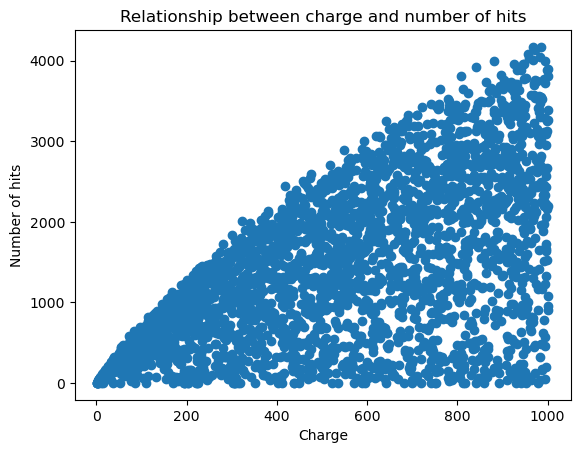

In [52]:
# Extract the hits and charges from the datasets
hits = [x[1] for x in event_hit_counts]

# Create the scatter plot
plt.scatter(charges, hits)
plt.xlabel('Charge')
plt.ylabel('Number of hits')
plt.title('Relationship between charge and number of hits')
plt.show()

By looking at the scatter plot, we can visually inspect the relationship between the charge and the number of hits. There is a clear positive relationship between the two variables, as we can see a trend of points increasing from left to right.

### 2D Scatter Plot

3000 3000


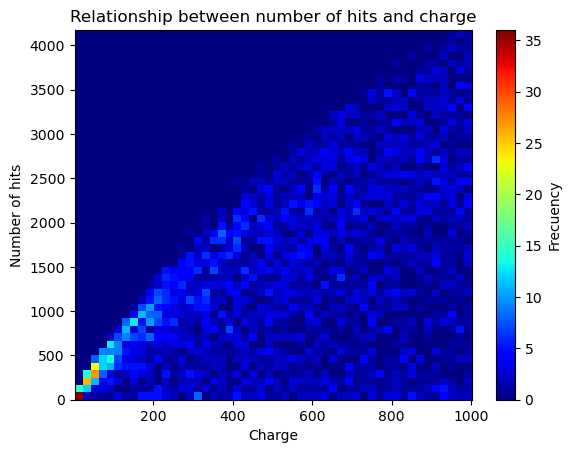

In [53]:
print(len(charges), len(event_hit_counts))

# reshape data to 1-dim array
hits_m = [x[1] for x in event_hit_counts]
charges_m = charges.ravel()

# Create the 2D histogram
plt.hist2d(charges_m, hits_m, bins=(50, 50), cmap=plt.cm.jet)
plt.xlabel('Charge')
plt.ylabel('Number of hits')
plt.title('Relationship between number of hits and charge')
plt.colorbar().set_label('Frecuency')
plt.show()

To create another visualization to understand the relationship between the number of hits and charge, we use a 2D histogram, where the x-axis represents the charge, the y-axis represents the number of hits, and the color represents the frequency of events with a particular combination of charge and number of hits. 

### Create list of arrays = [event_id, hits, charge]

In [54]:
# Create a list of tuples with the id event, number of hits, and charge of every event
event_data = [(event_hit_counts[i][0], event_hit_counts[i][1], charges[i][0]) for i in range(len(event_hit_counts))]

# Print the first few elements to verify the data is correct
print(event_data[:5])

# It follows the format: (event_id, number_hits, charge)

[(0, 846, 245.77759), (1, 863, 858.38684), (2, 479, 984.556), (3, 2902, 818.9892), (4, 240, 60.20741)]


### Sort the data events in ascending based on the hits

In [55]:
# Sort the event_data list based on the number of hits in ascending order
sorted_hits_event_data_asc = sorted(event_data, key=lambda x: x[1])

print(sorted_hits_event_data_asc[:5])

[(16, 0, 306.94162), (59, 0, 51.226894), (177, 0, 224.81505), (222, 0, 202.51004), (258, 0, 437.69864)]


### Filter the sorted data to events > 2,000 hits

In [56]:
# Filter the sorted event data list to only include events with more than 2000 hits
hits_threshold = 2000
filtered_event_data = [x for x in sorted_hits_event_data_asc if x[1] > hits_threshold]

# Print the filtered event data list to verify the filtering
print(filtered_event_data[:5])

[(1572, 2005, 826.65344), (2614, 2009, 562.8791), (1968, 2010, 541.743), (2376, 2012, 538.6635), (2549, 2012, 852.78394)]


## Boxplot Analysis of events > 2,000 hits

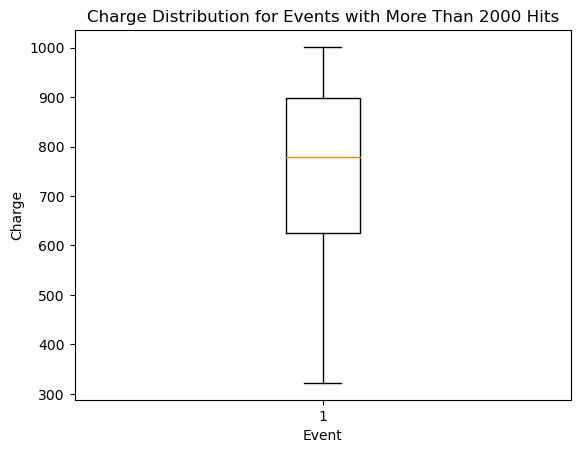

In [57]:
# Extract the charges from the filtered event data list
charges_filtered = [x[2] for x in filtered_event_data]

# Create a boxplot of the charges
plt.boxplot(charges_filtered)

# Add axis labels and title
plt.xlabel('Event')
plt.ylabel('Charge')
plt.title('Charge Distribution for Events with More Than 2000 Hits')

# Display the plot
plt.show()

### 2D Scatter Plot for Events > 2,000 Hits

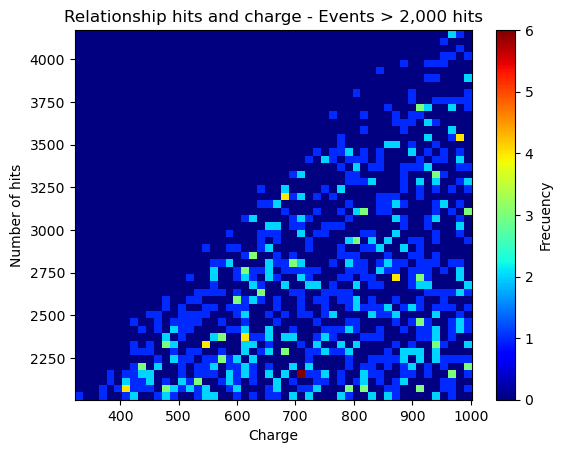

In [58]:
# Extract hits from filtered data
sorted_hits = [x[1] for x in filtered_event_data]
# Extract the charges from the filtered event data list
sorted_charges = [x[2] for x in filtered_event_data]

# Create the 2D histogram
plt.hist2d(sorted_charges, sorted_hits, bins=(50, 50), cmap=plt.cm.jet)
plt.xlabel('Charge')
plt.ylabel('Number of hits')
plt.title('Relationship hits and charge - Events > 2,000 hits')
plt.colorbar().set_label('Frecuency')
plt.show()